In [43]:
#Import extensions

import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from kneed import KneeLocator
import scipy as sp
import pandas as pd
from math import *
from decimal import Decimal 
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#Data Import
#Read Dataset
def importdata(localtrain, localteste, size_image):
    datagen = ImageDataGenerator(rescale=1./255)
    train_generator = datagen.flow_from_directory(localtrain, target_size=(size_image,size_image), 
                                                  batch_size=575, class_mode="categorical")
    test_generator = datagen.flow_from_directory(localteste, target_size=(size_image,size_image),
                                                 batch_size=61, class_mode="categorical")
    for x_train, y_train in train_generator:
        break
    for x_test, y_test in test_generator:
        break
    return x_train, y_train, x_test, y_test

In [3]:
#Data Preparation 
#rgb2gray


def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def gra(x_x):
    imgs = []
    for x in x_x:
        imgs.append(rgb2gray(x))
    x_x = np.array(imgs)
    return x_x

def is_gray(data, gray):
    if gray == 0:
        print("not convert to gray")
        return data
    elif gray == 1:
        print("convert to gray")
        data = gra(data)
        return data

In [54]:
#Data Preparation 
#Augmentation

def data_aug(x,y,z):
    #data augmentation
    datagen = ImageDataGenerator(
    rotation_range=0.001,
    width_shift_range=0.005,
    height_shift_range=0.005,
    shear_range=0.005,
    zoom_range=0.005,
    fill_mode='nearest')
    pics= []
    labels=[]
    i=0
    for pic, label in zip(x, y):
        x = image.img_to_array(pic)
        x = x.reshape((1,) + x.shape)
        i=0
        for batch in datagen.flow(x, batch_size=1):
            pics.append(batch[0].reshape(256,256))
            labels.append(label)
            i += 1
            if i % z == 0:
                break
    x_train=np.asarray(pics)
    y_train=np.asarray(labels)
    return x_train,y_train

#Join two lists of arrays
def join_arr (xtrain1, xtrain2):
    x_train = []
    for i in range(len(xtrain1)):
        x_train.append(xtrain1[i])
    for i in range(len(xtrain2)):
        x_train.append(xtrain2[i])
    x_train = np.asarray(x_train)
    return x_train 

def data_aug2(x_train, y_train, min, add): 
    xtrain = []
    ytrain = []
    # Percorrer todas as classes
    for i in range(0,y_train.shape[1]):
        l = 0
        count = 0
        categ = i
        #print(categ)
        #Verificar quantas fotos tem a classe selecionada
        for j in range(0,y_train.shape[0]):
            if np.argmax(y_train[j]) == categ:
                count += 1 
                #Se tiver menos de 5 fotos pegar na primeira foto dessa classe    
        if count < min :
            l = 0
            j = 0
            while l == 0 :
                if np.argmax(y_train[j]) == categ:
                    #print(x_train[j])
                    xtrain.append(x_train[j])
                    ytrain.append(y_train[j])
                    l = 1
                else: 
                    j += 1
    xtrain = np.asarray(xtrain)
    ytrain = np.asarray(ytrain)
    print("Classes com menos de "+ str(min)+" imagens: " + str(len(ytrain)))
    xtrain, ytrain = data_aug(xtrain, ytrain, add)
    x_train = join_arr(x_train, xtrain)
    y_train = join_arr(y_train, ytrain) 
    return x_train, y_train

def control_aug(x_train, y_train, aug_min, aug_add):
    print("As Classes não podem conter menos de "+str(aug_min)+" imagens")
    print("As Classes que contiverem menos de "+str(aug_min)+" imagens, terão acrescentadas, "+str(aug_add)+" imagens")
    print("O shape inicial do x_train é: ")
    print(x_train.shape)
    print("O shape inicial do y_train é: ")
    print(y_train.shape)
    x_train, y_train = data_aug2(x_train, y_train, aug_min, aug_add)
    print("O shape final do x_train é: ")
    print(x_train.shape)
    print("O shape final do y_train é: ")
    print(y_train.shape)
    print("Finalized Augmentation\n")
    return x_train, y_train


Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.

Imagem Original:


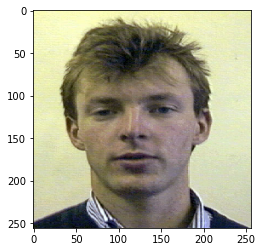

In [101]:
#Demonstração Convert Gray and Augmentation
demox_train, demoy_train, demox_test, demoy_test = importdata("aug", "prediction1", 256)
print("\nImagem Original:")
plt.imshow(demox_train[0])


convert to gray

Imagem Normalizada:


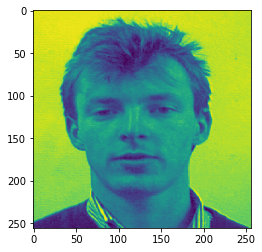

In [102]:
#Demonstração Convert Gray and Augmentation
demox_train = is_gray(demox_train, gray=1)
print("\nImagem Normalizada:")
plt.imshow(demox_train[0])

As Classes não podem conter menos de 4 imagens
As Classes que contiverem menos de 4 imagens, terão acrescentadas, 5 imagens
O shape inicial do x_train é: 
(1, 256, 256)
O shape inicial do y_train é: 
(1, 1)
Classes com menos de 4 imagens: 1
O shape final do x_train é: 
(6, 256, 256)
O shape final do y_train é: 
(6, 1)
Finalized Augmentation



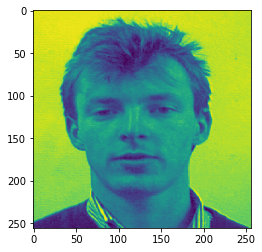

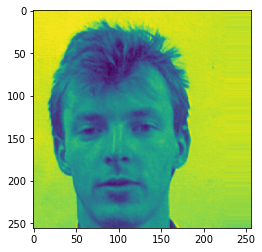

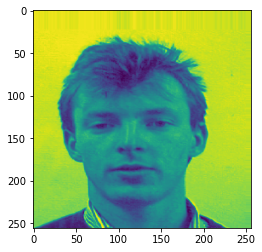

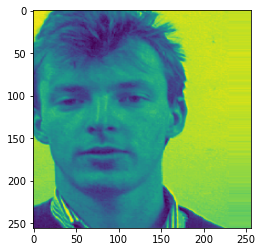

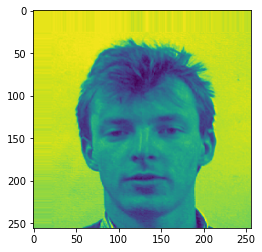

In [103]:
#Demonstração Convert Gray and Augmentation
def data_aug1(x,y,z):
    #data augmentation
    datagen = ImageDataGenerator(
    rotation_range=0.1,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    fill_mode='nearest')
    pics= []
    labels=[]
    i=0
    for pic, label in zip(x, y):
        x = image.img_to_array(pic)
        x = x.reshape((1,) + x.shape)
        i=0
        for batch in datagen.flow(x, batch_size=1):
            pics.append(batch[0].reshape(256,256))
            labels.append(label)
            i += 1
            if i % z == 0:
                break
    x_train=np.asarray(pics)
    y_train=np.asarray(labels)
    return x_train,y_train

#Join two lists of arrays
def join_arr1(xtrain1, xtrain2):
    x_train = []
    for i in range(len(xtrain1)):
        x_train.append(xtrain1[i])
    for i in range(len(xtrain2)):
        x_train.append(xtrain2[i])
    x_train = np.asarray(x_train)
    return x_train 
def data_aug21(x_train, y_train, min, add): 
    xtrain = []
    ytrain = []
    # Percorrer todas as classes
    for i in range(0,y_train.shape[1]):
        l = 0
        count = 0
        categ = i
        #print(categ)
        #Verificar quantas fotos tem a classe selecionada
        for j in range(0,y_train.shape[0]):
            if np.argmax(y_train[j]) == categ:
                count += 1 
                #Se tiver menos de 5 fotos pegar na primeira foto dessa classe    
        if count < min :
            l = 0
            j = 0
            while l == 0 :
                if np.argmax(y_train[j]) == categ:
                    #print(x_train[j])
                    xtrain.append(x_train[j])
                    ytrain.append(y_train[j])
                    l = 1
                else: 
                    j += 1
    xtrain = np.asarray(xtrain)
    ytrain = np.asarray(ytrain)
    print("Classes com menos de "+ str(min)+" imagens: " + str(len(ytrain)))
    xtrain, ytrain = data_aug1(xtrain, ytrain, add)
    x_train = join_arr1(x_train, xtrain)
    y_train = join_arr1(y_train, ytrain) 
    return x_train, y_train
def control_aug1(x_train, y_train, aug_min, aug_add):
    print("As Classes não podem conter menos de "+str(aug_min)+" imagens")
    print("As Classes que contiverem menos de "+str(aug_min)+" imagens, terão acrescentadas, "+str(aug_add)+" imagens")
    print("O shape inicial do x_train é: ")
    print(x_train.shape)
    print("O shape inicial do y_train é: ")
    print(y_train.shape)
    x_train, y_train = data_aug21(x_train, y_train, aug_min, aug_add)
    print("O shape final do x_train é: ")
    print(x_train.shape)
    print("O shape final do y_train é: ")
    print(y_train.shape)
    print("Finalized Augmentation\n")
    return x_train, y_train
demox_train, demox_test = control_aug1(demox_train, demoy_train, aug_min=4, aug_add=5)
plt.figure()
plt.imshow(demox_train[0])
plt.figure()
plt.imshow(demox_train[1])
plt.figure()
plt.imshow(demox_train[2])
plt.figure()
plt.imshow(demox_train[3])
plt.figure()
plt.imshow(demox_train[4])

In [5]:
def elbow_technic(array):
    x = range(0, len(array+1))
    kn = KneeLocator(x, array, curve='convex', direction='decreasing')
    return kn.knee


def projecoes_train(x_train):
    size = len(x_train)
    projecoes= []
    X = np.array([x_train[i].flatten() for i in range(size)])
    media = np.mean(X,0)
    
    #subtrair o valor de cada celula à média da respetiva coluna
    phi=X-media
    e_faces, sigma, v = np.linalg.svd(phi.transpose(), full_matrices=False)
    val_prop=sigma*sigma
    k=elbow_technic(val_prop)
    print("O k otimo é :" + str(k))
    #grafico que representa a descida do quociente da soma dos valores proprios
    plt.figure(figsize=(10,10))
    t = np.arange(0, size, 1)
    plt.plot(t, val_prop, 'x')
    plt.plot(k, val_prop[k], 'o')
    plt.show()
    val_prop=val_prop[:k]
    coef_proj = [np.dot(phi[i], e_faces[:,:k]) for i in range(size)]
    #retorno a media,e_faces porque vai ser usada na funcao projecoes teste
    projecoes=coef_proj
    return np.asarray(coef_proj), media,e_faces,val_prop,k

def projecoes_test(x_test,media,e_faces,k):
    projecoes= []
    for pic in x_test:
        #tornar a imagem num vetor 1D
        gamma = np.array(pic.flatten())
        #calcular a diferença entre a imagem e a média de cada coluna
        test_phi = gamma - media
        #calcular a projeçao dos dados nos vetores proprios
        #usar apenas as primeiras k eigen_faces
        test_coef_proj = np.dot(test_phi, e_faces[:,:k])
        projecoes.append(test_coef_proj)
    return np.asarray(projecoes)


In [6]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def cosine_distance(row1,row2):
    if row1.size!=row2.size:
        return(-1)
    z=row2-row1
    numer=np.dot(row1,row2)
    denom=np.linalg.norm(row1,2)*np.linalg.norm(row2,2)
    diss=1-numer/denom
    return diss 

#manhattan
def cityblock_distance(row1, row2): 
    result = np.sum([abs(a - b) for (a, b) in zip(row1, row2)]) 
    return result 


def mahalanobis_distance(row1, row2,val_prop): 
    d1=np.square(row1-row2)
    d1=d1/val_prop
    d1=np.sum(d1)
    return np.sqrt(d1)
    #return distance.mahalanobis(row1,row2, iv)

In [7]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        #aqui tive de ir buscar o index que estava a 1, ou seja, a classe a que pertence
        if np.argmax(actual[i]) == np.argmax(predicted[i]):
            correct += 1
    return correct / float(len(actual)) * 100.0

def get_neighbors(x_train,x_test,val_prop, distance, num_neighbors):
    #o get_neighbors deles devolviam o vizinho e a distancia, eu fiz para retornar o indice dos vizinhos
    distances = []
    
    for train_row in x_train:
        if distance==mahalanobis_distance:
            dist = distance(x_test, train_row,val_prop)
        else:
            dist = distance(x_test, train_row)
        distances.append((dist))
    #poe em ordem os k primeiros, parece que os restantes tambem estao mas nao estao, devolver o indice
    idx_neighbors = np.argpartition(distances, num_neighbors)
    return idx_neighbors[:num_neighbors]

#
def predict_classification(x_train,y_train,x_test,val_prop, distance ,num_neighbors):
    neighbors = get_neighbors(x_train,x_test,val_prop, distance, num_neighbors)
    prediction = list(y_train[neighbors])
    predicoes=np.zeros(len(y_train[0]))
    for p in prediction:
        indice=np.argmax(p)
        predicoes[indice]=predicoes[indice]+1
    
    return predicoes

#KNN  - Execução é feita num ciclo for para as imagens do teste
def k_nearest_neighbors(x_train,y_train,x_test,y_test,val_prop,distance, num_neighbors):
    predictions=[]
    for x,y in zip(x_test,y_test):
        output = predict_classification(x_train,y_train,x,val_prop,distance, num_neighbors)
        predictions.append(output)
    return(predictions)

#Executa o KNN e calcula a sua accuracy
def evaluate_algorithm(x_train,y_train,x_test,y_test,val_prop ,algorithm,distance, num_neighbors):
    y_predicted = algorithm(x_train,y_train,x_test,y_test,val_prop, distance, num_neighbors)
    return accuracy_metric(y_test, y_predicted)

In [8]:
def result_knn(x_train,y_train,x_test,y_test, val_prop, num_neighbors_max):
    num_neighbors=num_neighbors_max
    intervalo=range(num_neighbors)
    num_neighbors=[x+1 for x in intervalo]
    scores_euclidean=[]
    scores_cosine=[]
    scores_cityblock=[]
    scores_mahalanobis=[]
    for k in num_neighbors:
        scores_euclidean.append(evaluate_algorithm(x_train,y_train,x_test,y_test, val_prop, k_nearest_neighbors,euclidean_distance, k))
        scores_cosine.append(evaluate_algorithm(x_train,y_train,x_test,y_test, val_prop, k_nearest_neighbors,cosine_distance, k))
        scores_cityblock.append(evaluate_algorithm(x_train,y_train,x_test,y_test, val_prop, k_nearest_neighbors,cityblock_distance, k))
        scores_mahalanobis.append(evaluate_algorithm(x_train,y_train,x_test,y_test, val_prop, k_nearest_neighbors,mahalanobis_distance, k))
    x=range(num_neighbors_max)
    x=[x+1 for x in x]
    plt.plot(x,scores_euclidean, label = "euclidean distance")
    plt.plot(x,scores_cosine, label = "cosine distance")
    plt.plot(x,scores_cityblock, label = "cityblock distance")
    plt.plot(x,scores_mahalanobis, label = "mahalanobis distance")
    print("mahatan results: "+ str(scores_mahalanobis))
    print("city block results: " + str(scores_cityblock))
    print("cosine results: " + str (scores_cosine))
    print("euclidian results: " + str(scores_euclidean))
    plt.xlabel('neighbours number')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid()
    plt.show()
    

In [9]:
def job_results(file_train, file_test, size_image, as_gray, aug_min, aug_add, num_neighbors_max):
    
    try:
        print("import data ...")
        x_train, y_train, x_test, y_test = importdata(r"/Users/Rui Freitas/workspace/eigen_faces/"+str(file_train), 
                                                      r"/Users/Rui Freitas/workspace/eigen_faces/"+str(file_test),
                                                      size_image)
        print("data successfully imported \n")
    except BaseException as e:
        logger.error('Failed to do something: ' + str(e))
    
    try:
        print("Convert Color")
        x_train = is_gray(x_train, gray = as_gray)
        x_test = is_gray(x_test, gray = as_gray)
        print("\n")
    except BaseException as e:
        logger.error('Failed to do something: ' + str(e))
    
    try:
        print("Iniciate Augmentation")
        x_train, y_train = control_aug(x_train, y_train, aug_min, aug_add)
    except BaseException as e:
        logger.error('Failed to do something: ' + str(e))
    
    try:
        print("criar valores próprios e vetores singulares")
        x_train,media,e_faces,val_prop,k=projecoes_train(x_train)
        x_test=projecoes_test(x_test,media,e_faces,k)
        #display(plt.matshow(np.reshape(e_faces.T[0], (256,256)), cmap='gray'))
        print("shape do x_train:")
        print(x_train.shape)
        print("shape do x_test:")
        print(x_test.shape)
        print("shape do y_train:")
        print(y_train.shape)
        print("shape do y_test:")
        print(y_test.shape)
        print("Tarefa terminada\n")
    except BaseException as e:
        logger.error('Failed to do something: ' + str(e))
    
    try:
        result_knn(x_train,y_train,x_test,y_test, val_prop, num_neighbors_max = num_neighbors_max)
    except BaseException as e:
        logger.error('Failed to do something: ' + str(e))

In [19]:
def is_gray1(data, gray):
    if gray == 0:
        #print("not convert to gray")
        return data
    elif gray == 1:
        #print("convert to gray")
        data = gra(data)
        return data
def control_aug1(x_train, y_train, aug_min, aug_add):
    x_train, y_train = data_aug2(x_train, y_train, aug_min, aug_add)
    return x_train, y_train    

def get_neighbors1(x_train,x_test,val_prop, distance, num_neighbors):
    #o get_neighbors deles devolviam o vizinho e a distancia, eu fiz para retornar o indice dos vizinhos
    distances = []
    
    for train_row in x_train:
        if distance==mahalanobis_distance:
            dist = distance(x_test, train_row,val_prop)
        else:
            dist = distance(x_test, train_row)
        distances.append((dist))
    #poe em ordem os k primeiros, parece que os restantes tambem estao mas nao estao, devolver o indice
    idx_neighbors = np.argpartition(distances, num_neighbors)
    return idx_neighbors[:num_neighbors], distances

def predict_classification1(x_train,y_train,x_test,val_prop, distance ,num_neighbors):
    neighbors, distances = get_neighbors1(x_train,x_test,val_prop, distance, num_neighbors)
    prediction = list(y_train[neighbors])
    predicoes=np.zeros(len(y_train[0]))
    for p in prediction:
        indice=np.argmax(p)
        predicoes[indice]=predicoes[indice]+1
    return predicoes, distances

def predict_knn(x_train1, x_train,y_train,x_test,y_test, val_prop, distance ,num_neighbors,distance_risk):
    predi, distances = predict_classification1(x_train,y_train,x_test,val_prop, distance ,num_neighbors)
    print("Polls from Nearest Neighbors:")
    print(predi)
    predi = np.argmax(predi)
    print("This person's class is:")
    print(predi)
    i = 0
    j = 0
    while j == 0:
        if predi == np.argmax(y_train[i]):
            predi = i
            j = 1
        else:
            i += 1
    print("distance mean:")
    print(sum(distances)/len(distances))
    if sum(distances)/len(distances) > distance_risk:
        print(" Not Authorized")
    else:
        print("Authorized")
        plt.imshow(x_train1[predi])
    
def make_predicton(file_train, input_test, size_image, as_gray, aug_min, aug_add, distance ,num_neighbors, distance_risk):
    
    try:
        #print("import data ...")
        x_train, y_train, x_test, y_test = importdata(r"/Users/Rui Freitas/workspace/eigen_faces/"+str(file_train), 
                                                      r"/Users/Rui Freitas/workspace/eigen_faces/"+str(input_test),
                                                      size_image)
        #print("data successfully imported \n")
    except BaseException as e:
        logger.error('Failed to do something: ' + str(e))
    
    x_train1 = x_train
    plt.imshow(x_test[0])
    
    try:
        #print("Convert Color")
        x_train = is_gray1(x_train, gray = as_gray)
        x_test = is_gray1(x_test, gray = as_gray)
        #print("\n")
    except BaseException as e:
        logger.error('Failed to do something: ' + str(e))
    
    try:
        print("Iniciate Augmentation")
        x_train, y_train = control_aug1(x_train, y_train, aug_min, aug_add)
    except BaseException as e:
        logger.error('Failed to do something: ' + str(e))
    
    try:
        #print("criar valores próprios e vetores singulares")
        x_train,media,e_faces,val_prop,k=projecoes_train(x_train)
        x_test=projecoes_test(x_test,media,e_faces,k)
        #display(plt.matshow(np.reshape(e_faces.T[0], (256,256)), cmap='gray'))
        #print("shape do x_train:")
        #print(x_train.shape)
        #print("shape do x_test:")
        #print(x_test.shape)
        #print("shape do y_train:")
        #print(y_train.shape)
        #print("shape do y_test:")
        #print(y_test.shape)
        #print("Tarefa terminada\n")
    except BaseException as e:
        logger.error('Failed to do something: ' + str(e))
    
    try:
        predict_knn(x_train1, x_train,y_train,x_test,y_test, val_prop, distance ,num_neighbors, distance_risk)
    except BaseException as e:
        logger.error('Failed to do something: ' + str(e))



import data ...
Found 595 images belonging to 61 classes.
Found 61 images belonging to 61 classes.
data successfully imported 

Convert Color
convert to gray
convert to gray


Iniciate Augmentation
As Classes não podem conter menos de 4 imagens
As Classes que contiverem menos de 4 imagens, terão acrescentadas, 5 imagens
O shape inicial do x_train é: 
(575, 256, 256)
O shape inicial do y_train é: 
(575, 61)
Classes com menos de 4 imagens: 24
O shape final do x_train é: 
(695, 256, 256)
O shape final do y_train é: 
(695, 61)
Finalized Augmentation

criar valores próprios e vetores singulares
O k otimo é :28


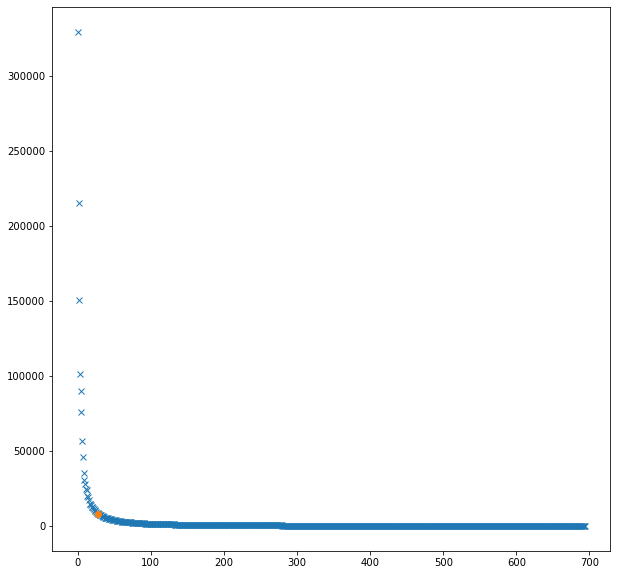

shape do x_train:
(695, 28)
shape do x_test:
(61, 28)
shape do y_train:
(695, 61)
shape do y_test:
(61, 61)
Tarefa terminada

mahatan results: [91.80327868852459, 86.88524590163934, 90.1639344262295, 80.32786885245902, 77.04918032786885, 77.04918032786885, 73.77049180327869, 72.1311475409836, 77.04918032786885, 73.77049180327869]
city block results: [72.1311475409836, 63.934426229508205, 65.57377049180327, 63.934426229508205, 59.01639344262295, 60.65573770491803, 59.01639344262295, 55.73770491803278, 52.459016393442624, 49.18032786885246]
cosine results: [62.295081967213115, 55.73770491803278, 50.81967213114754, 47.540983606557376, 49.18032786885246, 50.81967213114754, 44.26229508196721, 40.98360655737705, 42.62295081967213, 44.26229508196721]
euclidian results: [63.934426229508205, 55.73770491803278, 52.459016393442624, 52.459016393442624, 50.81967213114754, 50.81967213114754, 45.90163934426229, 42.62295081967213, 40.98360655737705, 39.34426229508197]


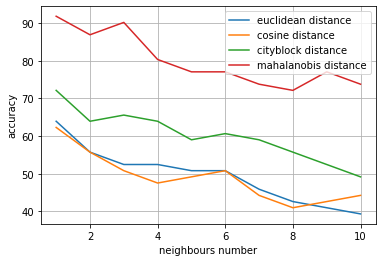

In [104]:
job_results(file_train = "Treino1", 
            file_test = "Teste1", 
            size_image = 256, 
            as_gray = 1, 
            aug_min = 4, 
            aug_add = 5,
            num_neighbors_max = 10)

import data ...
Found 595 images belonging to 61 classes.
Found 61 images belonging to 61 classes.
data successfully imported 

Convert Color
not convert to gray
not convert to gray


Iniciate Augmentation
As Classes não podem conter menos de 0 imagens
As Classes que contiverem menos de 0 imagens, terão acrescentadas, 5 imagens
O shape inicial do x_train é: 
(575, 256, 256, 3)
O shape inicial do y_train é: 
(575, 61)
Classes com menos de 0 imagens: 0
O shape final do x_train é: 
(575, 256, 256, 3)
O shape final do y_train é: 
(575, 61)
Finalized Augmentation

criar valores próprios e vetores singulares
O k otimo é :25


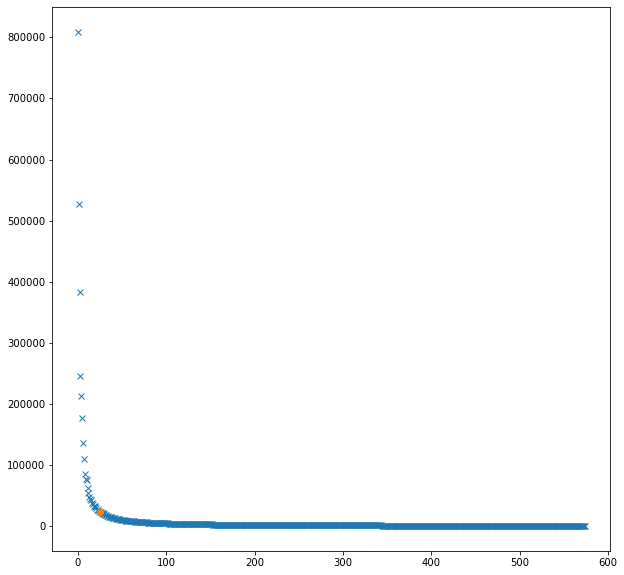

shape do x_train:
(575, 25)
shape do x_test:
(61, 25)
shape do y_train:
(575, 61)
shape do y_test:
(61, 61)
Tarefa terminada

mahatan results: [78.68852459016394, 73.77049180327869, 73.77049180327869, 70.49180327868852, 75.40983606557377, 68.85245901639344, 67.21311475409836, 60.65573770491803, 52.459016393442624, 55.73770491803278]
city block results: [67.21311475409836, 52.459016393442624, 55.73770491803278, 57.377049180327866, 57.377049180327866, 60.65573770491803, 59.01639344262295, 52.459016393442624, 49.18032786885246, 49.18032786885246]
cosine results: [59.01639344262295, 50.81967213114754, 44.26229508196721, 44.26229508196721, 44.26229508196721, 37.704918032786885, 36.0655737704918, 39.34426229508197, 37.704918032786885, 37.704918032786885]
euclidian results: [62.295081967213115, 49.18032786885246, 50.81967213114754, 50.81967213114754, 44.26229508196721, 44.26229508196721, 42.62295081967213, 37.704918032786885, 40.98360655737705, 39.34426229508197]


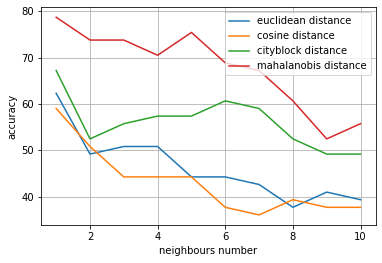

In [108]:
job_results(file_train = "Treino1", 
            file_test = "Teste1", 
            size_image = 256, 
            as_gray = 0, 
            aug_min = 0, 
            aug_add = 5,
            num_neighbors_max = 10)

Found 595 images belonging to 61 classes.
Found 1 images belonging to 1 classes.
Iniciate Augmentation
Classes com menos de 4 imagens: 24
O k otimo é :26


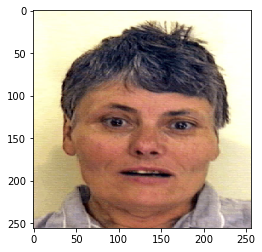

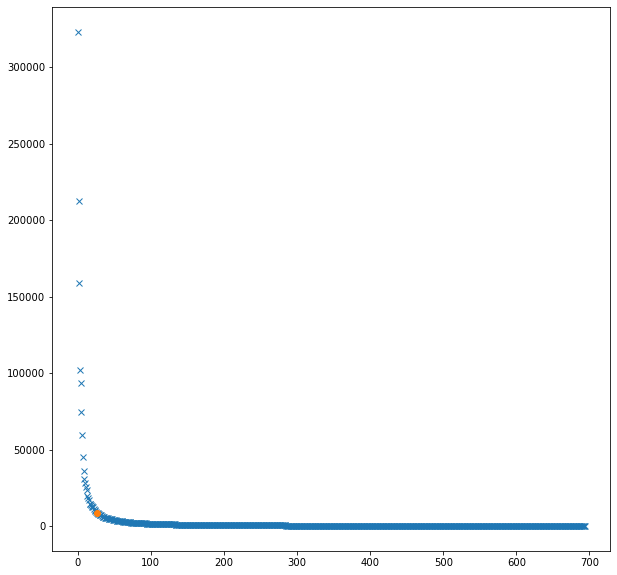

Polls from Nearest Neighbors:
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
This person's class is:
8
distance mean:
0.24084752782000055
Authorized


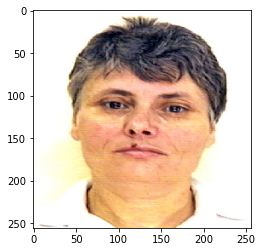

In [29]:
make_predicton(file_train = "Treino1" , 
               input_test = "prediction1", 
               size_image = 256, 
               as_gray = 1, 
               aug_min = 4, 
               aug_add = 5,
               distance = mahalanobis_distance ,
               num_neighbors = 1,
               distance_risk = 0.3)

import data ...
Found 32 images belonging to 5 classes.
Found 5 images belonging to 5 classes.
data successfully imported 

Convert Color
convert to gray
convert to gray


Iniciate Augmentation
As Classes não podem conter menos de 4 imagens
As Classes que contiverem menos de 4 imagens, terão acrescentadas, 5 imagens
O shape inicial do x_train é: 
(32, 256, 256)
O shape inicial do y_train é: 
(32, 5)
Classes com menos de 4 imagens: 0
O shape final do x_train é: 
(32, 256, 256)
O shape final do y_train é: 
(32, 5)
Finalized Augmentation

criar valores próprios e vetores singulares
O k otimo é :4


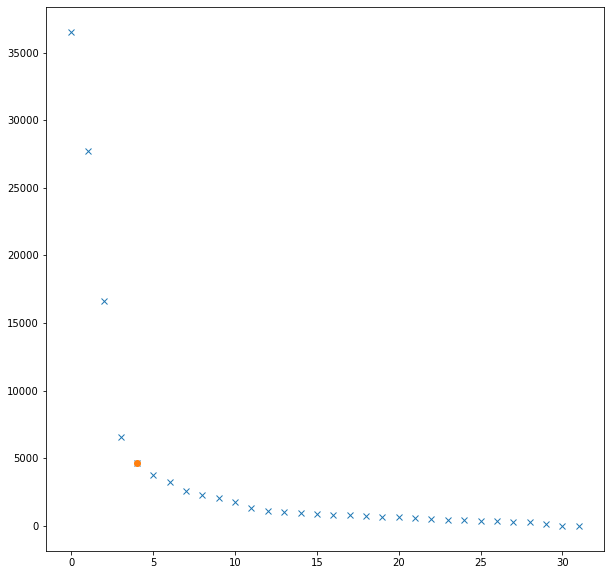

shape do x_train:
(32, 4)
shape do x_test:
(5, 4)
shape do y_train:
(32, 5)
shape do y_test:
(5, 5)
Tarefa terminada

mahatan results: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 80.0, 80.0]
city block results: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 60.0]
cosine results: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 80.0]
euclidian results: [100.0, 100.0, 100.0, 100.0, 100.0, 80.0, 100.0, 80.0, 60.0, 60.0]


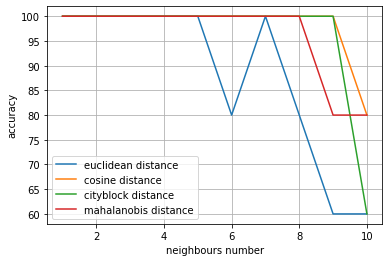

In [30]:
job_results(file_train = "Treino", 
            file_test = "Teste", 
            size_image = 256, 
            as_gray = 1, 
            aug_min = 4, 
            aug_add = 5,
            num_neighbors_max = 10)

Found 32 images belonging to 5 classes.
Found 1 images belonging to 1 classes.
Iniciate Augmentation
Classes com menos de 4 imagens: 0
O k otimo é :4


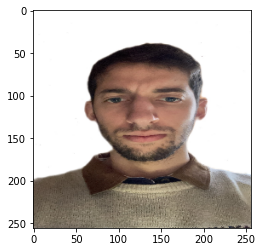

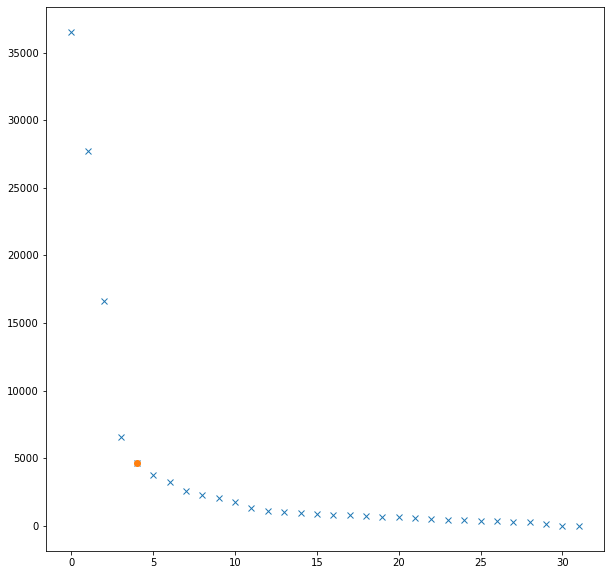

Polls from Nearest Neighbors:
[5. 3. 0. 2. 0.]
This person's class is:
0
distance mean:
0.44762987503781915
Authorized


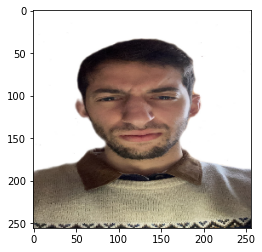

In [59]:
make_predicton(file_train = "Treino" , 
               input_test = "prediction", 
               size_image = 256, 
               as_gray = 1, 
               aug_min = 4, 
               aug_add = 5, 
               distance = mahalanobis_distance ,
               num_neighbors = 10,
               distance_risk = 0.6)

Found 595 images belonging to 61 classes.
Found 1 images belonging to 1 classes.
Iniciate Augmentation
As Classes não podem conter menos de 4 imagens
As Classes que contiverem menos de 4 imagens, terão acrescentadas, 5 imagens
O shape inicial do x_train é: 
(575, 256, 256)
O shape inicial do y_train é: 
(575, 61)
Classes com menos de 4 imagens: 24
O shape final do x_train é: 
(695, 256, 256)
O shape final do y_train é: 
(695, 61)
Finalized Augmentation

O k otimo é :29


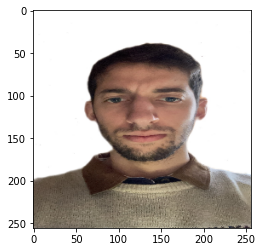

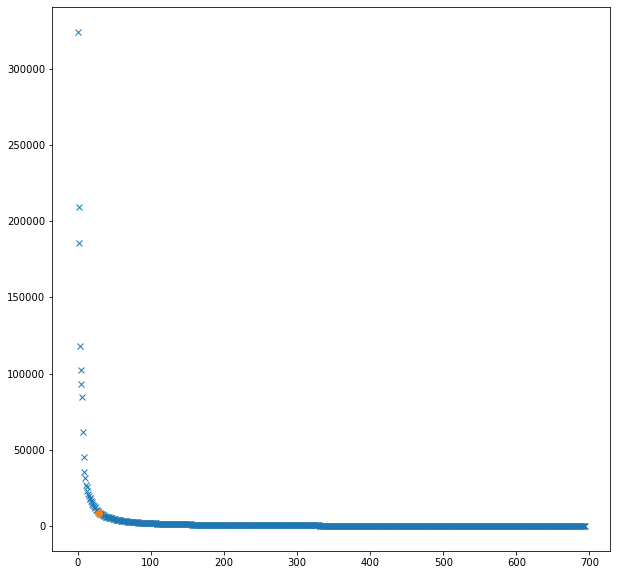

Polls from Nearest Neighbors:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
This person's class is:
28
distance mean:
0.3107750154013256
 Not Authorized


In [110]:
make_predicton(file_train = "Treino1" , 
               input_test = "prediction", 
               size_image = 256, 
               as_gray = 1, 
               aug_min = 4, 
               aug_add = 5, 
               distance = mahalanobis_distance ,
               num_neighbors = 1,
               distance_risk = 0.3)